# Question 1

Discuss the concept and application of Time series analysis using machine learning modelling by providing a real-world data set. 

What is the purpose of The Augmented Dickey-Fuller test in time series?
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. The ARIMA model mostly fit on the stationary dataset so we check the dataset is stationary or not by using the Dickey-Fuller Test.

a) Apply an appropriate Box-Jenkins model to the chosen dataset (ARMA, ARIMA, SARIMA etc). Check for the model adequacy.


In [ ]:
##pip install --upgrade statsmodels pandas


In [1]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.simplefilter("ignore")

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Import dataset
df=pd.read_csv('jewelry.csv')
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [3]:
df.isnull().sum()

2018-12-01 11:40:29 UTC        0
1924719191579951782            0
1842195256808833386            0
1                              0
1806829201890738522         5352
jewelry.earring             9933
0                           4785
561.51                      5352
1515915625207851155         5352
Unnamed: 9                 48167
red                         7660
gold                        5462
diamond                    34058
dtype: int64

In [4]:
# Checking dataset dimension
df.shape

(95910, 13)

In [5]:
# check dataset column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2018-12-01 11:40:29 UTC  95910 non-null  object 
 1   1924719191579951782      95910 non-null  int64  
 2   1842195256808833386      95910 non-null  int64  
 3   1                        95910 non-null  int64  
 4   1806829201890738522      90558 non-null  float64
 5   jewelry.earring          85977 non-null  object 
 6   0                        91125 non-null  float64
 7   561.51                   90558 non-null  float64
 8   1515915625207851155      90558 non-null  float64
 9   Unnamed: 9               47743 non-null  object 
 10  red                      88250 non-null  object 
 11  gold                     90448 non-null  object 
 12  diamond                  61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [6]:
df.head()
#no columns, add columns
columns = ['order_date','order_id','user_id','purchase','category_id','category','brand','price','price_id','buyer','colour1','colour2','type']
df.columns = columns

In [7]:
print(df.head())

                order_date             order_id              user_id  \
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446   
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449   

   purchase   category_id          category  brand   price      price_id  \
0         1  1.806829e+18               NaN    NaN  212.14  1.515916e+18   
1         1  1.806829e+18   jewelry.pendant    1.0   54.66  1.515916e+18   
2         1  1.806829e+18   jewelry.pendant    0.0   88.90  1.515916e+18   
3         1  1.806829e+18  jewelry.necklace    0.0  417.67  1.515916e+18   
4         1  1.806829e+18   jewelry.earring    1.0  102.27  1.515916e+18   

  buyer colour1 colour2      type  
0   NaN  yellow    gold       NaN  
1     f   white    gold  sapphire  
2 

In [8]:
#Checking for null values in columns

df.isnull().sum()

order_date         0
order_id           0
user_id            0
purchase           0
category_id     5352
category        9933
brand           4785
price           5352
price_id        5352
buyer          48167
colour1         7660
colour2         5462
type           34058
dtype: int64

In [9]:
#dropping columns not needed
df.drop(columns=['order_id','category_id','price_id','colour1','colour2'],inplace=True)

In [25]:
#try to identify unique entries - check how many unique customers, brands and orders id are there.
#need to compare order id's to customers to check whether same customer placed more than 1 order (improvement)

unique_entries_dataframe = df.apply(lambda x: x.unique())


In [38]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [12]:
df.head()

,order_date,user_id,purchase,category,brand,price,buyer,type
0,2018-12-01 17:38:31 UTC,1806829193678291446,1,NaN,NaN,212.14,NaN,NaN
1,2018-12-02 13:53:42 UTC,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,sapphire
2,2018-12-02 17:44:02 UTC,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,diamond
3,2018-12-02 21:30:19 UTC,1873936840742928865,1,jewelry.necklace,0.0,417.67,NaN,amethyst
4,2018-12-02 22:09:34 UTC,1835566854827934449,1,jewelry.earring,1.0,102.27,NaN,NaN


In [13]:
## treating date format on dataset to use as index, so we convert this in date format
from datetime import datetime
df['order_date']=pd.to_datetime(df['order_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   order_date  95910 non-null  datetime64[ns, UTC]
 1   user_id     95910 non-null  int64              
 2   purchase    95910 non-null  int64              
 3   category    85977 non-null  object             
 4   brand       91125 non-null  float64            
 5   price       90558 non-null  float64            
 6   buyer       47743 non-null  object             
 7   type        61852 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 5.9+ MB


In [15]:
##Changing/select important column to be used as index column.
df=df.set_index('order_date')
df.head()

,user_id,purchase,category,brand,price,buyer,type
order_date,,,,,,,
2018-12-01 17:38:31+00:00,1806829193678291446,1,NaN,NaN,212.14,NaN,NaN
2018-12-02 13:53:42+00:00,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,sapphire
2018-12-02 17:44:02+00:00,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,diamond
2018-12-02 21:30:19+00:00,1873936840742928865,1,jewelry.necklace,0.0,417.67,NaN,amethyst
2018-12-02 22:09:34+00:00,1835566854827934449,1,jewelry.earring,1.0,102.27,NaN,NaN


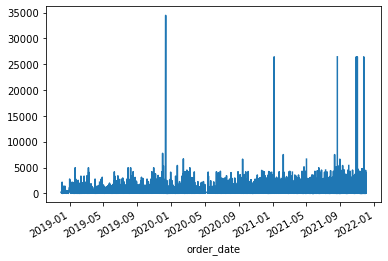

In [30]:
df['price'].plot();

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
adfuller(df['price'])

(-43.43740023879711,
 0.0,
 38,
 95871,
 {'1%': -3.4304182111910597,
  '5%': -2.861570148263478,
  '10%': -2.5667860468681853},
 1433753.9573457872)

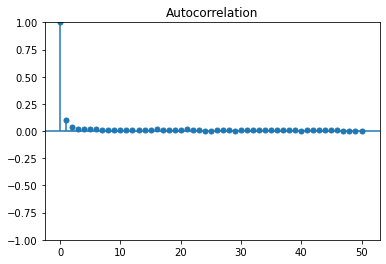

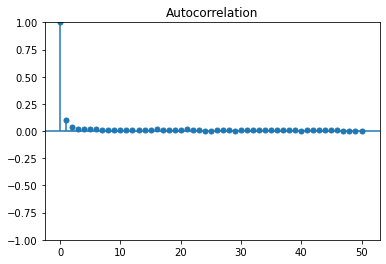

In [40]:
# This ACF (Autocorrelation function) defines how data points
#in time series are related on average to the preceding data points

plot_acf(df['price'])

Count the number of significant likes. 
Autocorrelation is the measure of each observation is correlated 
to the previous observation. 

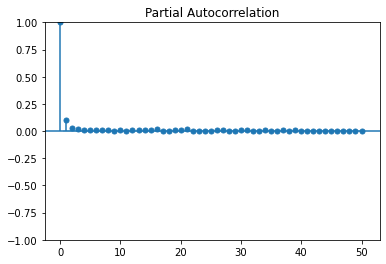

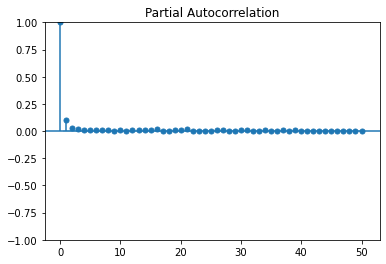

In [41]:
plot_pacf(df["price"], method='ywm')

ACF - Exponential decay => no MA (q=0)

PACF - Signigicant value at lag 1 ie p=1

In [ ]:
By reviewing the autocorrelation above, we can see that there
is no significant likes of correlation between obs(t) and t-1,
t-2 and so on. 

# ARIMA

In [56]:
import statsmodels.tsa.api as smtsa
#number of samples
n=600
#Generate AR(1) dataset
ar = np.r_[1,-0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
#plotds(ar1_data)

ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', tren='nc')
ar1.summary()

AttributeError: module 'statsmodels.tsa.api' has no attribute 'ARMA'

In [61]:
## create a ARIMA model

model_ARMA=ARIMA(df['price'],order=(1,0,2))

In [62]:
model_Arima_fit=model_ARMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                95910
Model:                 ARIMA(1, 0, 2)   Log Likelihood             -717282.499
Date:                Tue, 28 Nov 2023   AIC                        1434574.998
Time:                        20:04:58   BIC                        1434622.354
Sample:                             0   HQIC                       1434589.397
                              - 95910                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.2125     10.185     35.564      0.000     342.250     382.175
ar.L1          0.9997      0.000   9576.014      0.000       0.999       1.000
ma.L1         -0.9053      0.001   -934.625      0.000      -0.907      -0.903
ma.L2         -0.0928      0.001    -93.498      0.000      -0.095      -0.091
sigma2      1.834e+05     44.581   4114.273      0.000    1.83e+05    1.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):        5299852797.67
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            19.85
Prob(H) (two-sided):                  0.00   Kurtosis:                      1153.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
##prediction
pred_start_date=df.index[0]
pred_end_date=df.index[-1]
print(pred_start_date)
print(pred_end_date)

2018-12-01 17:38:31+00:00
2021-12-01 09:59:07+00:00


In [65]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=df['price']-pred

In [66]:
pred

order_date
2018-12-01 17:38:31+00:00    362.212513
2018-12-02 13:53:42+00:00    347.599752
2018-12-02 17:44:02+00:00    332.717633
2018-12-02 21:30:19+00:00    335.977572
2018-12-02 22:09:34+00:00    366.514163
                                ...    
2021-12-01 09:47:37+00:00    393.930587
2021-12-01 09:50:37+00:00    416.561185
2021-12-01 09:52:06+00:00    401.869072
2021-12-01 09:55:35+00:00    440.706357
2021-12-01 09:59:07+00:00    385.779613
Name: predicted_mean, Length: 95910, dtype: float64

In [67]:
residuals

order_date
2018-12-01 17:38:31+00:00   -150.072513
2018-12-02 13:53:42+00:00   -292.939752
2018-12-02 17:44:02+00:00   -243.817633
2018-12-02 21:30:19+00:00     81.692428
2018-12-02 22:09:34+00:00   -264.244163
                                ...    
2021-12-01 09:47:37+00:00    -31.717571
2021-12-01 09:50:37+00:00   -186.571185
2021-12-01 09:52:06+00:00    228.130928
2021-12-01 09:55:35+00:00   -357.286357
2021-12-01 09:59:07+00:00   -288.659613
Length: 95910, dtype: float64

NameError: name 'tail' is not defined

In [70]:
pred=model_Arima_fit.predict(start='2021-12-01 08:59:07',end='2021-12-01 09:59:07')
residuals=df['price'].unique()[-10]-pred

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

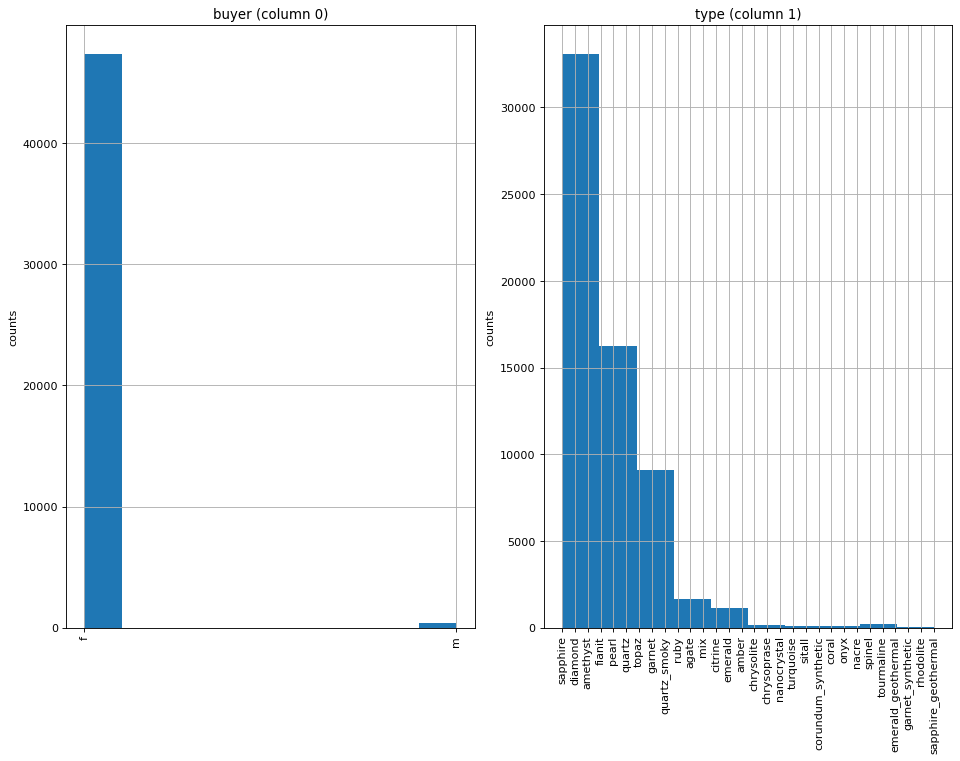

In [19]:
plotPerColumnDistribution(df, 10, 5)

In [42]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [45]:
plotCorrelationMatrix(df, 2)

AttributeError: 'DataFrame' object has no attribute 'dataframeName'